In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [94]:
data = pd.read_csv('my_data.csv', index_col=0)

data.head()

,url,fork,stars,contr_count,lang,have_site,have_releases,license
0,https://github.com/MabezDev/xtensa-rust-quicks...,43,342,1,"[('Rust', 100.0)]",False,False,NaN
1,https://github.com/srijs/rust-aws-lambda,19,320,1,"[('Rust', 100.0)]",False,False,MIT license
2,https://github.com/servo/rust-mozjs,122,292,1,"[('Rust', 75.8), ('C++', 23.1)]",False,False,MPL-2.0 license
3,https://github.com/budziq/rust-skeptic,42,282,1,"[('Rust', 100.0)]",False,False,NaN
4,https://github.com/maidsafe/sn_routing,83,276,1,"[('Rust', 98.3), ('Shell', 1.7)]",False,False,View license


In [95]:
data.dtypes

url              object
fork              int64
stars             int64
contr_count       int64
lang             object
have_site          bool
have_releases      bool
license          object
dtype: object

/tmp/ipykernel_218404/1576046855.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(data_corr.corr())


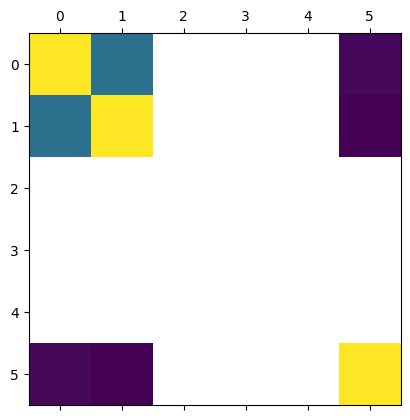

In [96]:
# data['lang'].unique()
data_corr = data.copy()
data_corr.license = data_corr.license.astype('category').cat.codes
data_corr = data_corr[data_corr.stars !=0]
data_corr = data_corr[data_corr.fork !=0]
data_corr = data_corr[data_corr.contr_count != 0]
plt.matshow(data_corr.corr())
plt.show()

We found out that all out project don't have sites and have only one contributor, so this data is irrelevant


Lets create more features

In [97]:
data = data.drop(columns=['have_site','have_releases','contr_count'])
data.head()

,url,fork,stars,lang,license
0,https://github.com/MabezDev/xtensa-rust-quicks...,43,342,"[('Rust', 100.0)]",NaN
1,https://github.com/srijs/rust-aws-lambda,19,320,"[('Rust', 100.0)]",MIT license
2,https://github.com/servo/rust-mozjs,122,292,"[('Rust', 75.8), ('C++', 23.1)]",MPL-2.0 license
3,https://github.com/budziq/rust-skeptic,42,282,"[('Rust', 100.0)]",NaN
4,https://github.com/maidsafe/sn_routing,83,276,"[('Rust', 98.3), ('Shell', 1.7)]",View license


In [106]:
data['rust_percent'] = data.lang.str.extract(r'\(\'Rust\',\s(.*?)\)').astype(float)
data['cpp_percent'] = data.lang.str.extract(r'\(\'C\+\+\',\s(.*?)\)').fillna(value=0).astype(float)
data['language_count'] = data.lang.str.count('\)')
data.head()

,url,fork,stars,lang,license,rust_percent,cpp_percent,language_count
0,https://github.com/MabezDev/xtensa-rust-quicks...,43,342,"[('Rust', 100.0)]",NaN,100.0,0.0,1
1,https://github.com/srijs/rust-aws-lambda,19,320,"[('Rust', 100.0)]",MIT license,100.0,0.0,1
2,https://github.com/servo/rust-mozjs,122,292,"[('Rust', 75.8), ('C++', 23.1)]",MPL-2.0 license,75.8,23.1,2
3,https://github.com/budziq/rust-skeptic,42,282,"[('Rust', 100.0)]",NaN,100.0,0.0,1
4,https://github.com/maidsafe/sn_routing,83,276,"[('Rust', 98.3), ('Shell', 1.7)]",View license,98.3,0.0,2


/tmp/ipykernel_218404/2380192523.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(data_corr.corr())


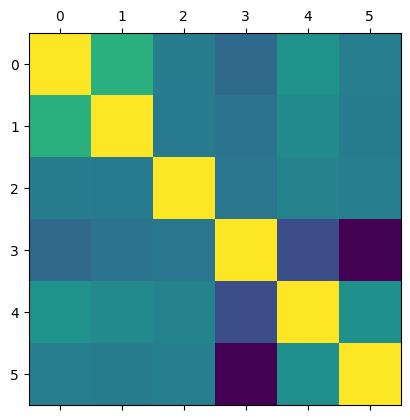

url                object
fork                int64
stars               int64
lang               object
license              int8
rust_percent      float64
cpp_percent       float64
language_count      int64
dtype: object

In [107]:
data_corr = data.copy()
data_corr.license = data_corr.license.astype('category').cat.codes
data_corr = data_corr[data_corr.stars !=0]
data_corr = data_corr[data_corr.fork !=0]
plt.matshow(data_corr.corr())
plt.show()

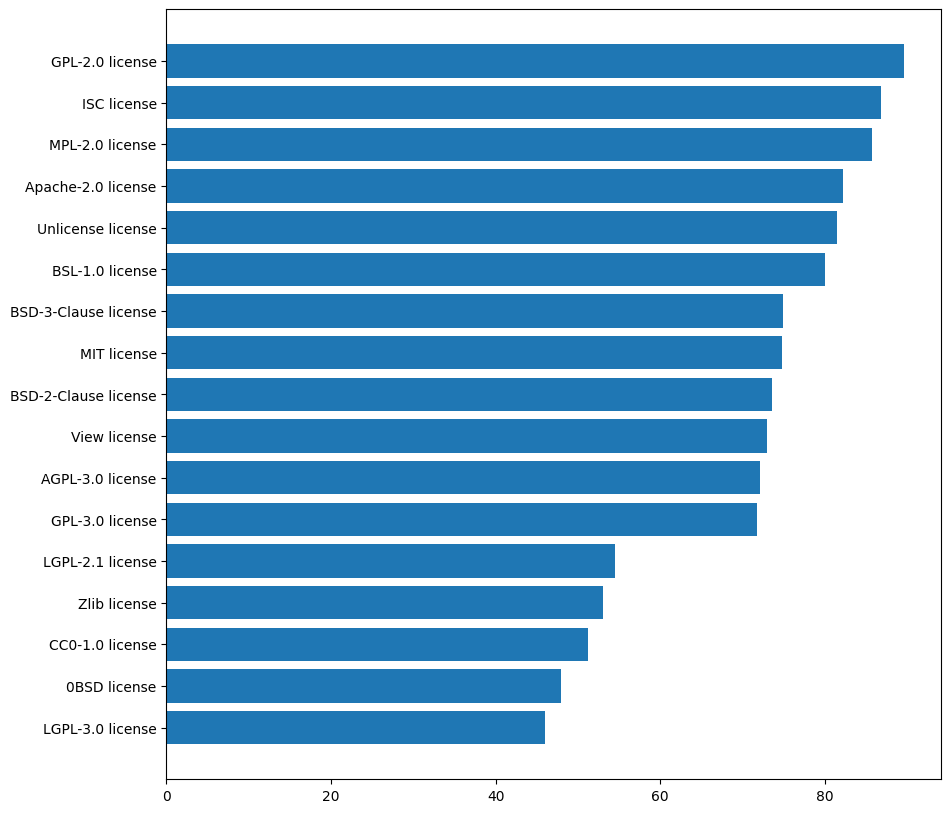

In [119]:
bar = data.groupby('license').stars.mean().sort_values()

plt.figure(figsize=(10, 10)) 
plt.barh(bar.index, bar.values)


plt.show()

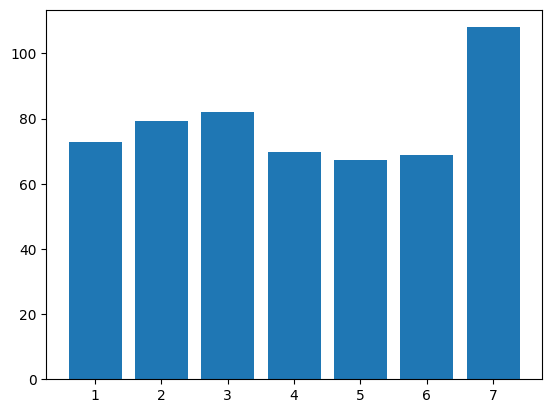

In [122]:
bar = data.groupby('language_count').stars.mean().sort_values()

plt.bar(bar.index, bar.values)


plt.show()

Lets check features. 

1) Is fully Rust project

In [123]:
data['full_rust']=data.rust_percent==100
data.full_rust

0       True
1       True
2      False
3       True
4      False
       ...  
995     True
996    False
997     True
998     True
999    False
Name: full_rust, Length: 1000, dtype: bool

2) Forks per language

In [124]:
data['forks_per_lang']=data.fork / data.language_count
data.forks_per_lang

0      43.0
1      19.0
2      61.0
3      42.0
4      41.5
       ... 
995    17.0
996     1.0
997     1.0
998    13.0
999     1.0
Name: forks_per_lang, Length: 1000, dtype: float64

/tmp/ipykernel_218404/4079742048.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(data_corr.corr())


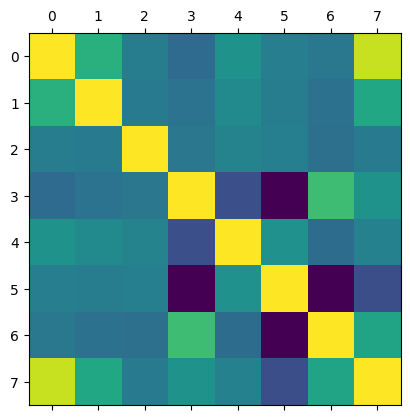

In [127]:
data_corr = data.copy()
data_corr.license = data_corr.license.astype('category').cat.codes
data_corr = data_corr[data_corr.stars !=0]
data_corr = data_corr[data_corr.fork !=0]
plt.matshow(data_corr.corr())
plt.show()

In [137]:
data_l = data.copy()
data_l.license = data_l.license.astype('category')
data_l = pd.get_dummies(data_l, columns=['license'])
data_l.full_rust = data_l.full_rust.astype(int)
data_l = data_l.drop(columns=['url','lang',])
data_l = data_l.astype('float')
data_l.head()

,fork,stars,rust_percent,cpp_percent,language_count,full_rust,forks_per_lang,license_0BSD license,license_AGPL-3.0 license,license_Apache-2.0 license,...,license_GPL-2.0 license,license_GPL-3.0 license,license_ISC license,license_LGPL-2.1 license,license_LGPL-3.0 license,license_MIT license,license_MPL-2.0 license,license_Unlicense license,license_View license,license_Zlib license
0,43.0,342.0,100.0,0.0,1.0,1.0,43.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,19.0,320.0,100.0,0.0,1.0,1.0,19.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,122.0,292.0,75.8,23.1,2.0,0.0,61.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,42.0,282.0,100.0,0.0,1.0,1.0,42.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,83.0,276.0,98.3,0.0,2.0,0.0,41.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [138]:
data_l.to_csv('data_preproced.csv')